In [1]:
# Calling garbage collector
import gc
gc.collect()

62

In [2]:
import pandas as pd
from utils import *

## Reading datasets

In [3]:
#Read SSDP DDOS dataset
ssdp_df = pd.read_csv('/home/trabajo04/test_ypd/01-12/DrDoS_SSDP.csv',engine="python")

In [4]:
#Read MSSQL DDOS dataset
mssql_df =pd.read_csv('/home/trabajo04/test_ypd/01-12/DrDoS_MSSQL.csv',engine="python")

In [6]:
ddos_df = pd.concat([ssdp_df,mssql_df])
del ssdp_df
del mssql_df

## Formatting datasets

In [7]:
tcp_df = strip_columns(ddos_df)

In [8]:
column_names = ['Flow ID', 'Unnamed: 0','Source IP','Destination IP','Destination Port','Timestamp','SimillarHTTP']
tcp_df = remove_columns(tcp_df, column_names)

In [9]:
tcp_df = tcp_df.dropna()

In [10]:
column_names = ['Flow Bytes/s', 'Flow Packets/s']
tcp_df = delete_inf_rows(tcp_df, column_names)

In [11]:
from collections import Counter
print ("inf in flow bytes/s",Counter(tcp_df["Flow Bytes/s"]==np.inf))
print ("inf in flow packet/s",Counter(tcp_df["Flow Packets/s"]==np.inf))

inf in flow bytes/s Counter({False: 6840207})
inf in flow packet/s Counter({False: 6840207})


## Undersampling

In [12]:
y = tcp_df['Label'].copy()
X = tcp_df
del X['Label']

In [13]:
from collections import Counter
counter  = dict(Counter(y))

counter

{'DrDoS_SSDP': 2482110, 'BENIGN': 2700, 'DrDoS_MSSQL': 4355397}

In [14]:
import time

start_time = time.time()


X_ures, y_ures = undersampling(X, y, n_neighbors = 1)


elapsed_time = time.time() - start_time

print("Elapsed time: ", elapsed_time)

Elapsed time:  46722.96402096748


In [ ]:
Counter(y_ures)

Counter({'BENIGN': 2700, 'DrDoS_MSSQL': 3919725, 'DrDoS_SSDP': 1748538})

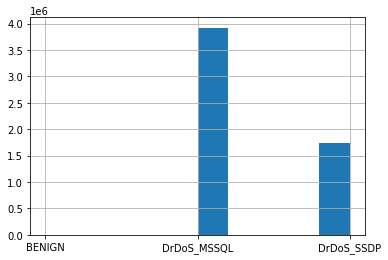

In [ ]:
y_ures.hist()

## Oversampling

In [ ]:
import time

start_time = time.time()
X_ores, y_ores = oversampling(X_ures, y_ures) 

elapsed_time = time.time() - start_time

print("Elapsed time: ", elapsed_time)

Elapsed time:  3480.076376914978


In [ ]:
counter = dict(Counter(y_ores))
counter

{'BENIGN': 3919725, 'DrDoS_MSSQL': 3919725, 'DrDoS_SSDP': 3919725}

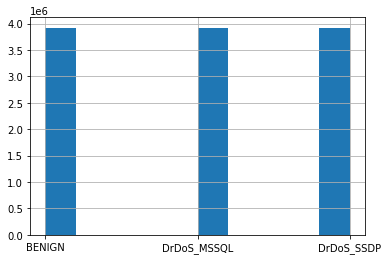

In [ ]:
y_ores.hist()

## Saving datasets

In [21]:
X_ores.to_csv('/home/trabajo04/test_ypd/Datasets/DrDoS_BOTH_features.csv', index=False)
y_ores.to_csv('/home/trabajo04/test_ypd/Datasets/DrDoS_BOTH_labels.csv', index=False)

In [22]:
X_ores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11759175 entries, 0 to 11759174
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Source Port                  int64  
 1   Protocol                     int64  
 2   Flow Duration                int64  
 3   Total Fwd Packets            int64  
 4   Total Backward Packets       int64  
 5   Total Length of Fwd Packets  float64
 6   Total Length of Bwd Packets  float64
 7   Fwd Packet Length Max        float64
 8   Fwd Packet Length Min        float64
 9   Fwd Packet Length Mean       float64
 10  Fwd Packet Length Std        float64
 11  Bwd Packet Length Max        float64
 12  Bwd Packet Length Min        float64
 13  Bwd Packet Length Mean       float64
 14  Bwd Packet Length Std        float64
 15  Flow Bytes/s                 float64
 16  Flow Packets/s               float64
 17  Flow IAT Mean                float64
 18  Flow IAT Std                 float64
 19